In [241]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import re
# Importing the date time class from the datetime module
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(12,8) #Adjusts the configuration of the plots we will create

# Read in the data
df =pd.read_csv(r'C:\Users\User\Documents\Data Analyst Portfolio\Python\movies.csv').set_index('ID')




In [242]:
#Convert Column headers to string
df.columns = df.columns.astype("str")
 
#Change headers to Uppercase
df.columns = df.columns.str.upper()

# viewing the data
df.head()

,NAME,RATING,GENRE,YEAR,RELEASED,SCORE,VOTES,DIRECTOR,WRITER,STAR,COUNTRY,BUDGET,GROSS,COMPANY,RUNTIME
ID,,,,,,,,,,,,,,,
1,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
2,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
3,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
4,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
5,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [244]:
#Check for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

NAME - 0.0%
RATING - 0.010041731872717789%
GENRE - 0.0%
YEAR - 0.0%
RELEASED - 0.0002608242044861763%
SCORE - 0.0003912363067292645%
VOTES - 0.0003912363067292645%
DIRECTOR - 0.0%
WRITER - 0.0003912363067292645%
STAR - 0.00013041210224308815%
COUNTRY - 0.0003912363067292645%
BUDGET - 0.2831246739697444%
GROSS - 0.02464788732394366%
COMPANY - 0.002217005738132499%
RUNTIME - 0.0005216484089723526%


In [245]:
# Data types for columns
df.dtypes

NAME         object
RATING       object
GENRE        object
YEAR          int64
RELEASED     object
SCORE       float64
VOTES       float64
DIRECTOR     object
WRITER       object
STAR         object
COUNTRY      object
BUDGET      float64
GROSS       float64
COMPANY      object
RUNTIME     float64
dtype: object

In [246]:
#Replace null values in the table

df["BUDGET"].fillna(0, inplace = True)
df["GROSS"].fillna(0, inplace = True)
df["VOTES"].fillna(0, inplace = True)
df["RATING"].fillna("No Rating", inplace = True)
df["RELEASED"].fillna("Not Available", inplace = True)
df["SCORE"].fillna(0, inplace = True)
df["WRITER"].fillna("Unknown", inplace = True)
df["COUNTRY"].fillna("Unknown", inplace = True)
df["COMPANY"].fillna("Unknown", inplace = True)
df["RUNTIME"].fillna(0, inplace = True) 
   
df.head()

,NAME,RATING,GENRE,YEAR,RELEASED,SCORE,VOTES,DIRECTOR,WRITER,STAR,COUNTRY,BUDGET,GROSS,COMPANY,RUNTIME
ID,,,,,,,,,,,,,,,
1,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
2,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
3,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
4,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
5,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [247]:
#Change Data type of columns
df['BUDGET'] = df['BUDGET'].astype('int64')
df['GROSS'] = df['GROSS'].astype('int64')
df['VOTES'] = df['VOTES'].astype('int64')
df.head()

,NAME,RATING,GENRE,YEAR,RELEASED,SCORE,VOTES,DIRECTOR,WRITER,STAR,COUNTRY,BUDGET,GROSS,COMPANY,RUNTIME
ID,,,,,,,,,,,,,,,
1,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
2,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
3,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
4,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
5,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [250]:
#Create Correct year column
df['YEARCORRECT'] =df['RELEASED'].astype(str)

# Set Indexes
index_released = df.columns.get_loc('RELEASED')
index_yearcorrect = df.columns.get_loc('YEARCORRECT')

#define Date Pattern
date_pattern = r'([0-9]{4})'

#Look for year in the Dataframe
for row in range(0, len(df)):
    try:
        match = re.search(date_pattern, df.iat[row, index_released]).group()
    except AttributeError:
        match = re.search(date_pattern, df.iat[row, index_released])   
    df.iat[row, index_yearcorrect] = match
df.head()

,NAME,RATING,GENRE,YEAR,RELEASED,SCORE,VOTES,DIRECTOR,WRITER,STAR,COUNTRY,BUDGET,GROSS,COMPANY,RUNTIME,YEARCORRECT
ID,,,,,,,,,,,,,,,,
1,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
2,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
3,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
4,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
5,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [251]:
(df.sort_values(by=['GROSS'], inplace =False, ascending =False)).head()

,NAME,RATING,GENRE,YEAR,RELEASED,SCORE,VOTES,DIRECTOR,WRITER,STAR,COUNTRY,BUDGET,GROSS,COMPANY,RUNTIME,YEARCORRECT
ID,,,,,,,,,,,,,,,,
5446,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7446,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3046,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6664,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7245,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [204]:
pd.set_option('display.max_rows', None)

Text(0, 0.5, 'Gross Earnings')

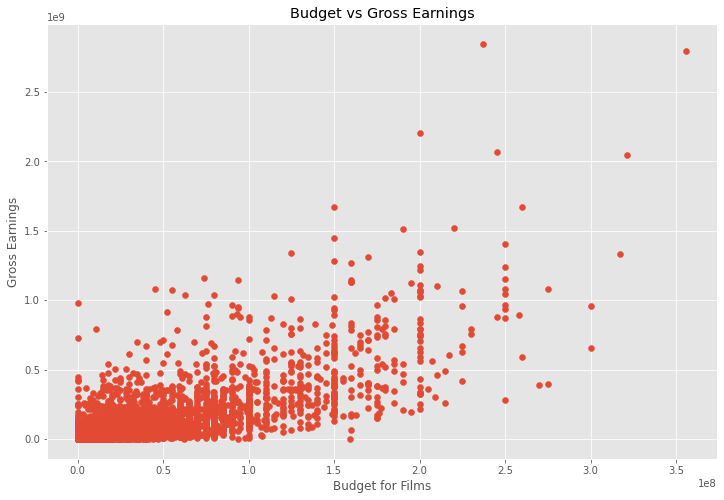

In [252]:
# Scatter plot with budget vs gross

plt.scatter(x=df['BUDGET'], y=df['GROSS'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Films')
plt.ylabel('Gross Earnings')


<AxesSubplot:xlabel='BUDGET', ylabel='GROSS'>

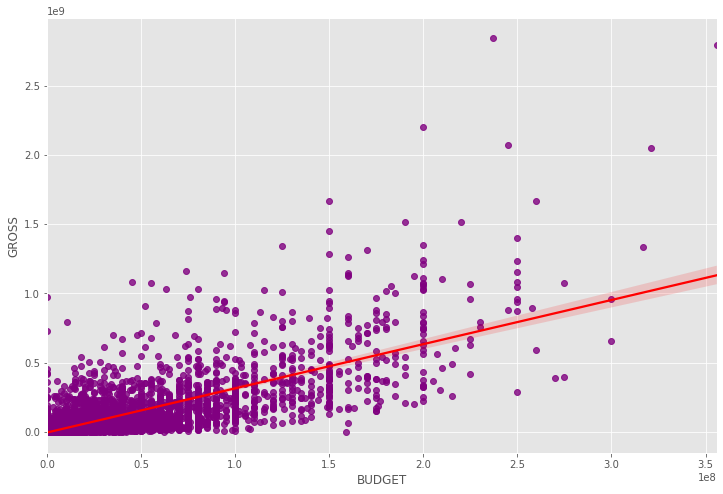

In [253]:
# Plot the budget vs gross using seaborn
sns.regplot(x='BUDGET', y='GROSS', data =df, scatter_kws = {"color": "purple"}, line_kws ={"color":"red"})

In [208]:
#Looking at Correlation
df.corr() #Pearson
df.corr(method = 'pearson') 

,YEAR,SCORE,VOTES,BUDGET,GROSS,RUNTIME
YEAR,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
SCORE,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
VOTES,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
BUDGET,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
GROSS,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
RUNTIME,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [209]:
df.corr(method = 'kendall') 

,YEAR,SCORE,VOTES,BUDGET,GROSS,RUNTIME
YEAR,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390
SCORE,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601
VOTES,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697
BUDGET,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184
GROSS,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429
RUNTIME,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000


In [210]:
df.corr(method = 'spearman') 

,YEAR,SCORE,VOTES,BUDGET,GROSS,RUNTIME
YEAR,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
SCORE,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
VOTES,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
BUDGET,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
GROSS,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
RUNTIME,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


In [186]:
#There is High Correlarion between Budget and Gross

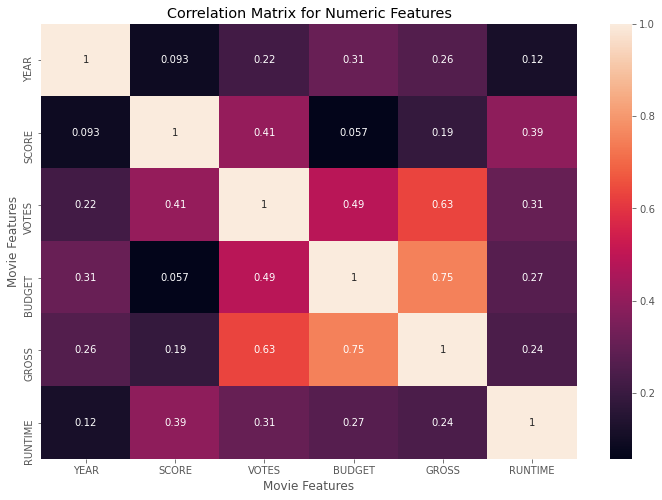

In [218]:
#Correlation Matrix
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [254]:
# convert columns to numeric values (categorical type)
df_numerized =df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype =='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized.head()
        


,NAME,RATING,GENRE,YEAR,RELEASED,SCORE,VOTES,DIRECTOR,WRITER,STAR,COUNTRY,BUDGET,GROSS,COMPANY,RUNTIME,YEARCORRECT
ID,,,,,,,,,,,,,,,,
1,6587,7,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2320,146.0,0
2,5573,7,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104.0,0
3,5142,5,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124.0,0
4,286,5,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88.0,0
5,1027,7,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98.0,0


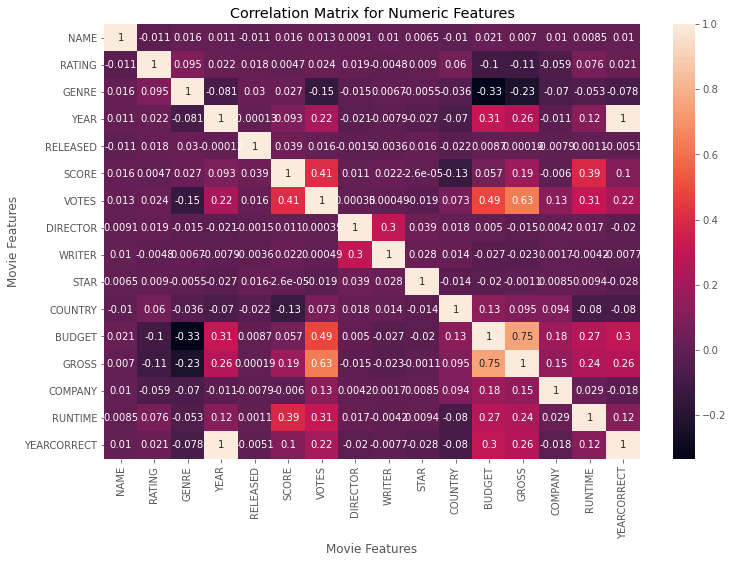

In [234]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [225]:
df_numerized.corr()

,NAME,RATING,GENRE,YEAR,RELEASED,SCORE,VOTES,DIRECTOR,WRITER,STAR,COUNTRY,BUDGET,GROSS,COMPANY,RUNTIME,YEARCORRECT
NAME,1.000000,-0.011237,0.016355,0.011453,-0.010703,0.016377,0.013038,0.009079,0.009985,0.006472,-0.010359,0.020548,0.006989,0.010373,0.008483,0.010225
RATING,-0.011237,1.000000,0.095126,0.022121,0.017978,0.004684,0.024117,0.019494,-0.004754,0.009034,0.059802,-0.102540,-0.111325,-0.059029,0.075799,0.020518
GENRE,0.016355,0.095126,1.000000,-0.081261,0.030296,0.027384,-0.145296,-0.015258,0.006747,-0.005477,-0.035783,-0.334021,-0.234297,-0.070032,-0.052914,-0.078210
YEAR,0.011453,0.022121,-0.081261,1.000000,-0.000128,0.092616,0.222427,-0.020795,-0.007930,-0.027242,-0.069590,0.309212,0.261900,-0.011425,0.116358,0.996397
RELEASED,-0.010703,0.017978,0.030296,-0.000128,1.000000,0.039362,0.015911,-0.001517,-0.003609,0.015803,-0.021841,0.008688,0.000186,-0.007928,0.001072,-0.005058
SCORE,0.016377,0.004684,0.027384,0.092616,0.039362,1.000000,0.407101,0.010568,0.022475,-0.000026,-0.134439,0.056863,0.186012,-0.005964,0.394564,0.100897
VOTES,0.013038,0.024117,-0.145296,0.222427,0.015911,0.407101,1.000000,0.000349,0.000487,-0.019146,0.073424,0.486931,0.632870,0.130535,0.306984,0.217782
DIRECTOR,0.009079,0.019494,-0.015258,-0.020795,-0.001517,0.010568,0.000349,1.000000,0.299523,0.039234,0.018014,0.004976,-0.014916,0.004248,0.017062,-0.020385
WRITER,0.009985,-0.004754,0.006747,-0.007930,-0.003609,0.022475,0.000487,0.299523,1.000000,0.028228,0.014490,-0.026777,-0.022963,0.001729,-0.004213,-0.007653
STAR,0.006472,0.009034,-0.005477,-0.027242,0.015803,-0.000026,-0.019146,0.039234,0.028228,1.000000,-0.013861,-0.019952,-0.001129,0.008463,0.009418,-0.027606


In [227]:
correlation_mat=df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

NAME         NAME           1.000000
             RATING        -0.011237
             GENRE          0.016355
             YEAR           0.011453
             RELEASED      -0.010703
             SCORE          0.016377
             VOTES          0.013038
             DIRECTOR       0.009079
             WRITER         0.009985
             STAR           0.006472
             COUNTRY       -0.010359
             BUDGET         0.020548
             GROSS          0.006989
             COMPANY        0.010373
             RUNTIME        0.008483
             YEARCORRECT    0.010225
RATING       NAME          -0.011237
             RATING         1.000000
             GENRE          0.095126
             YEAR           0.022121
             RELEASED       0.017978
             SCORE          0.004684
             VOTES          0.024117
             DIRECTOR       0.019494
             WRITER        -0.004754
             STAR           0.009034
             COUNTRY        0.059802
 

In [228]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

BUDGET       GENRE         -0.334021
GENRE        BUDGET        -0.334021
             GROSS         -0.234297
GROSS        GENRE         -0.234297
VOTES        GENRE         -0.145296
GENRE        VOTES         -0.145296
SCORE        COUNTRY       -0.134439
COUNTRY      SCORE         -0.134439
RATING       GROSS         -0.111325
GROSS        RATING        -0.111325
BUDGET       RATING        -0.102540
RATING       BUDGET        -0.102540
GENRE        YEAR          -0.081261
YEAR         GENRE         -0.081261
COUNTRY      YEARCORRECT   -0.080482
YEARCORRECT  COUNTRY       -0.080482
RUNTIME      COUNTRY       -0.079918
COUNTRY      RUNTIME       -0.079918
YEARCORRECT  GENRE         -0.078210
GENRE        YEARCORRECT   -0.078210
             COMPANY       -0.070032
COMPANY      GENRE         -0.070032
YEAR         COUNTRY       -0.069590
COUNTRY      YEAR          -0.069590
RATING       COMPANY       -0.059029
COMPANY      RATING        -0.059029
RUNTIME      GENRE         -0.052914
G

In [232]:
high_corr=sorted_pairs[(sorted_pairs) > 0.5]
high_corr

GROSS        VOTES          0.632870
VOTES        GROSS          0.632870
GROSS        BUDGET         0.750157
BUDGET       GROSS          0.750157
YEAR         YEARCORRECT    0.996397
YEARCORRECT  YEAR           0.996397
NAME         NAME           1.000000
COMPANY      COMPANY        1.000000
GROSS        GROSS          1.000000
BUDGET       BUDGET         1.000000
COUNTRY      COUNTRY        1.000000
STAR         STAR           1.000000
WRITER       WRITER         1.000000
DIRECTOR     DIRECTOR       1.000000
VOTES        VOTES          1.000000
SCORE        SCORE          1.000000
RELEASED     RELEASED       1.000000
YEAR         YEAR           1.000000
GENRE        GENRE          1.000000
RATING       RATING         1.000000
RUNTIME      RUNTIME        1.000000
YEARCORRECT  YEARCORRECT    1.000000
dtype: float64